In [6]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import scipy as sp
import matplotlib.image as img
import matplotlib.cm as cm
import cvxpy as cvx
import time
start_time = time.time()

In [7]:
def dct2(x):
        return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)
def idct2(x):
        return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

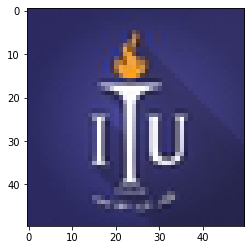

In [8]:
pic=img.imread('itu.jpg')
pic_zoom=pic
plt.imshow((pic_zoom) )
s=0.5 #Sampling Data ratio
row,col,channel=pic_zoom.shape
k=round(row*col*s)
ri = np.random.choice(row *  col, k, replace=False)
Xa=np.zeros(pic_zoom.shape,dtype=int)
masks = np.zeros(pic_zoom.shape,dtype=int)


In [9]:

for j in range(channel): #Loop for RGB 
    xx=pic_zoom[:,:,j].squeeze()
    X = 255 * np.ones(xx.shape)
    X.T.flat[ri] = xx.T.flat[ri]
    masks[:,:,j]=X
    b = xx.T.flat[ri].astype(float)
    A = np.kron(spfft.idct(np.identity(col), norm='ortho', axis=0),spfft.idct(np.identity(row), norm='ortho', axis=0))
    
    A = A[ri,:] # same as phi times kron
   

    
    vx = cvx.Variable(row * col)
    objective = cvx.Minimize(cvx.norm(vx, 1))
    constraints = [A*vx == b]
    prob = cvx.Problem(objective,constraints)
    result = prob.solve(verbose=True)
    
    
    x=np.array(vx.value).squeeze()
    x=x.reshape(col,row).T
    Xa[:,:,j] = idct2(x) # inverse cosine transform  (Back to Spatial domain)
     


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +4e+06  1e+00  1e-02  1e+00  8e+02    ---    ---    1  1  - |  -  - 
 1  +4.818e+03  +4.883e+03  +2e+06  9e-01  5e-03  7e+01  3e+02  0.6531  1e-01   1  1  1 |  0  0
 2  +9.595e+03  +9.614e+03  +3e+05  6e-01  9e-04  2e+01  6e+01  0.8355  3e-02   1  0  1 |  0  0
 3  +2.035e+04  +2.036e+04  +1e+05  2e-01  3e-04  8e+00  2e+01  0.6810  4e-02   1  0  1 |  0  0
 4  +3.072e+04  +3.073e+04  +3e+04  7e-02  9e-05  3e+00  7e+00  0.7313  3e-02   1  1  1 |  0  0
 5  +3.520e+04  +3.520e+04  +1e+04  3e-02  3e-05  1e+00  3e+00  0.6384  6e-02   1  1  1 |  0  0
 6  +3.696e+04  +3.696e+04  +6e+03  1e-02  1e-05  6e-01  1e+00  0.5885  5e-02   1  1  1 |  0  0
 7  +3.773e+04  +3.773e+04  +2e+03  5e-03  6e-06  3e-01  5e-01  0.6905  2e-01   1  1  1 |  0  0
 8  +3.806e+04  +3.806e+04  +1e+03  2e-03  3e-

--- 458.24019718170166 seconds ---


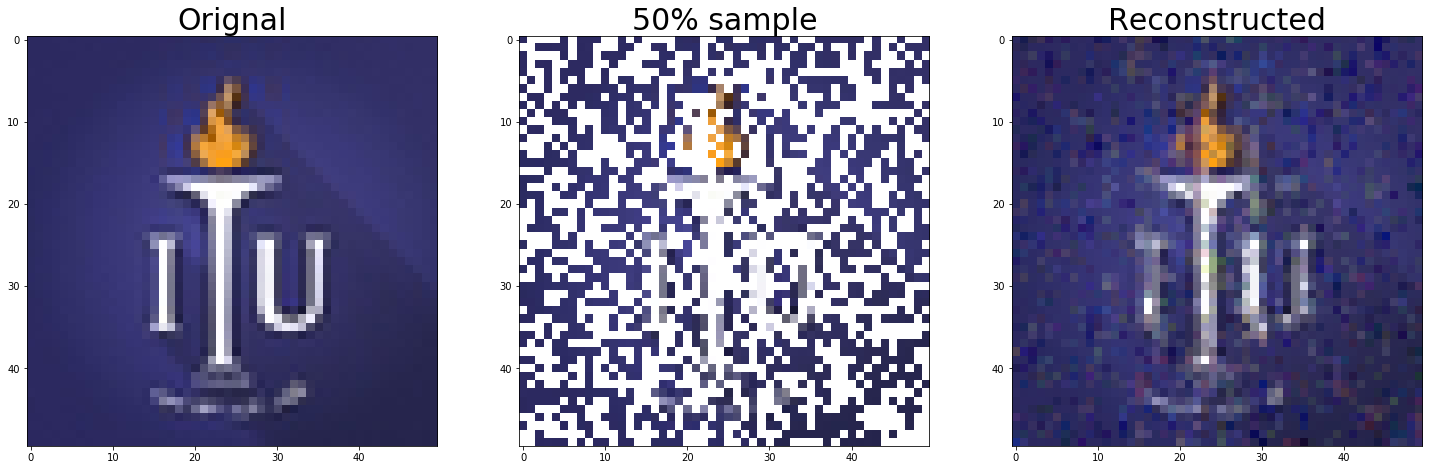

In [10]:

fig,axis=plt.subplots(1,3,figsize=(25,25))
axis[0].imshow(pic)
axis[0].set_title('Orignal',fontsize=30)
axis[1].imshow(masks)
axis[1].set_title('50% sample',fontsize=30)
axis[2].imshow(Xa)
axis[2].set_title('Reconstructed',fontsize=30)
print("--- %s seconds ---" % (time.time() - start_time))
